In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [3]:
color0 = np.array([0.5, 0.5, 0.5])
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])

In [4]:
log = lammps_logfile.File(path_data+"initial.log")
Step_EM = log.get("Step", run_num = 0)
PotEng_EM = log.get("TotEng", run_num = 0) # PotEn = TotEn the same if KinEn = 0
KinEng_EM = log.get("TotEng", run_num = 0)*0 # KinEn = 0
# During MD
timestep = 0.005
Step_MD = log.get("Step", run_num = 1)
Time_MD = Step_MD*timestep # time unit
PotEng_MD = log.get("PotEng", run_num = 1)
KinEng_MD = log.get("KinEng", run_num = 1)

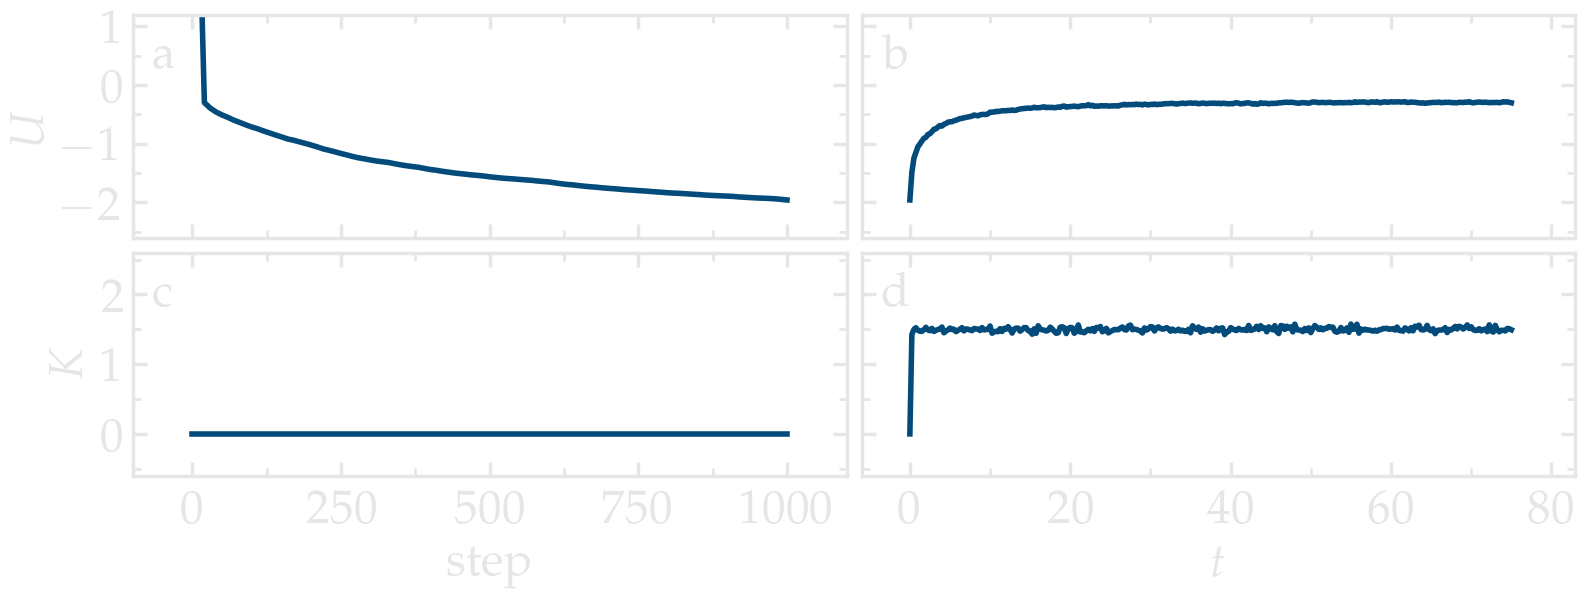

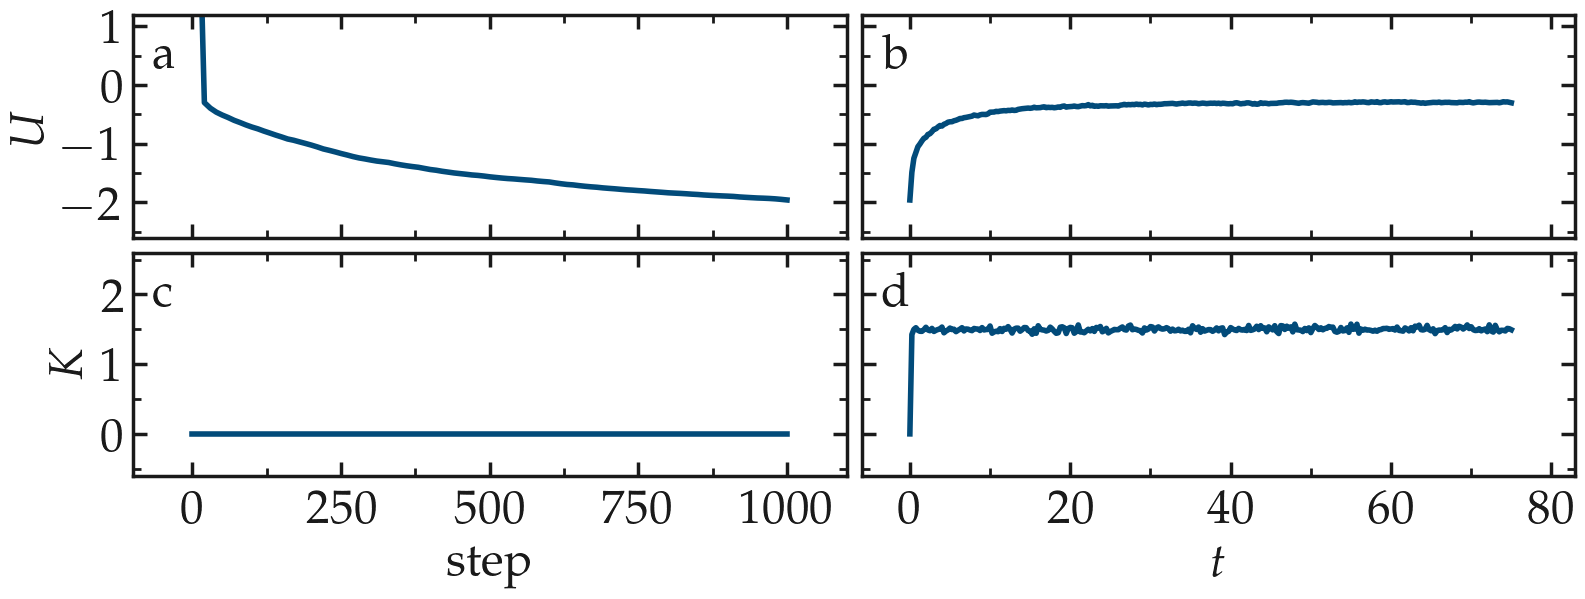

In [5]:
filename = "LJ-energy"

for dark_mode in [True, False]:

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (16,6.1), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=2, n_line=2)
    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = Step_EM, y = PotEng_EM, type = "plot", linewidth_data = 5,
                marker = "-", data_color = color2, markersize = 12, data_label = r'$p_\mathrm{e}$')
    myplt.complete_panel(ylabel = r'$U$', xlabel = None,
                        xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 1001, 250), x_boundaries=(-100, 1100.5),
                        y_ticks=np.arange(-2, 1.01, 1), y_boundaries=(-2.6, 1.2))
    # Panel b
    myplt.add_panel()
    #myplt.add_plot(x = Time_MD-Time_MD[0], y = PotEng_MD+KinEng_MD, type = "plot", linewidth_data = 3,
    #               marker = "-", data_color = np.array([0.2, 0.2, 0.2]), markersize = 12, data_label = r'$e_\mathrm{total}$')
    myplt.add_plot(x = Time_MD-Time_MD[0], y = PotEng_MD, type = "plot", linewidth_data = 5,
                marker = "-", data_color = color2, markersize = 12, data_label = r'$p_\mathrm{e}$')
    myplt.complete_panel(ylabel = None, xlabel = None,
                        xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 81, 20), x_boundaries=(-6, 83),
                        y_ticks=np.arange(-2, 1.01, 1), y_boundaries=(-2.6, 1.2))

    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = Step_EM, y = KinEng_EM, type = "plot", linewidth_data = 5,
                marker = "-", data_color = color2, markersize = 12, data_label = r'$k_\mathrm{e}$')
    myplt.complete_panel(ylabel = r'$K$', xlabel = r'$\mathrm{step}$',
                        xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 1001, 250), x_boundaries=(-100, 1100.5),
                        y_ticks=np.arange(0, 2.01, 1), y_boundaries=(-0.6, 2.6))
    # Panel b
    myplt.add_panel()
    #myplt.add_plot(x = Time_MD-Time_MD[0], y = PotEng_MD+KinEng_MD, type = "plot", linewidth_data = 3,
    #               marker = "-", data_color = np.array([0.2, 0.2, 0.2]), markersize = 12, data_label = r'$e_\mathrm{total}$')
    myplt.add_plot(x = Time_MD-Time_MD[0], y = KinEng_MD, type = "plot", linewidth_data = 5,
                marker = "-", data_color = color2, markersize = 12, data_label = r'$k_\mathrm{e}$')
    myplt.complete_panel(ylabel = None, xlabel = r'$t$',
                        xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 81, 20), x_boundaries=(-6, 83),
                        y_ticks=np.arange(0, 2.01, 1), y_boundaries=(-0.6, 2.6))

    # Print figure
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)